# Useful librairies

In [9]:
import pandas as pd
from pathlib import Path

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
import sys
matplotlib.rcParams["figure.facecolor"] = "white"

# Data Importation

In [2]:
#create a dataframe from the csv file Time_Value_CM.csv 
df = pd.read_csv('Time_Value_CM.csv', names=['Date', 'Value'])
df.head()

,Date,Value
0,2022-05-02T00:01:00Z,178961.742
1,2022-05-02T00:02:00Z,170609.878
2,2022-05-02T00:03:00Z,168829.864
3,2022-05-02T00:04:00Z,173252.734
4,2022-05-02T00:05:00Z,177271.117


# EDA

## Data Overview

In [4]:
#convert the date column to datetime format 
df['Date'] = pd.to_datetime(df['Date'], format="%Y-%m-%dT%H:%M:%SZ")
df.sort_values(by='Date', inplace=True)

In [87]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Day_of_week'] = df['Date'].dt.dayofweek.astype(int)
df['Hour'] = df['Date'].dt.hour
df['Minute'] = df['Date'].dt.minute
df['Second'] = df['Date'].dt.second

In [88]:
df.head()

,Date,Value,Weekend,Winter,Working hour,Mean,Variance,Normalized,Year,Month,Day,Hour,Minute,Second,Day_of_week
79143,2022-02-18 15:39:00,212141.645,0,1,1,197764.93159,4.322846e+09,0.000003,2022,2,18,15,39,0,4
79144,2022-02-18 15:40:00,216980.618,0,1,1,197764.93159,4.322846e+09,0.000004,2022,2,18,15,40,0,4
79145,2022-02-18 15:41:00,219702.692,0,1,1,197764.93159,4.322846e+09,0.000005,2022,2,18,15,41,0,4
79146,2022-02-18 15:42:00,218002.962,0,1,1,197764.93159,4.322846e+09,0.000005,2022,2,18,15,42,0,4
79147,2022-02-18 15:43:00,219366.764,0,1,1,197764.93159,4.322846e+09,0.000005,2022,2,18,15,43,0,4


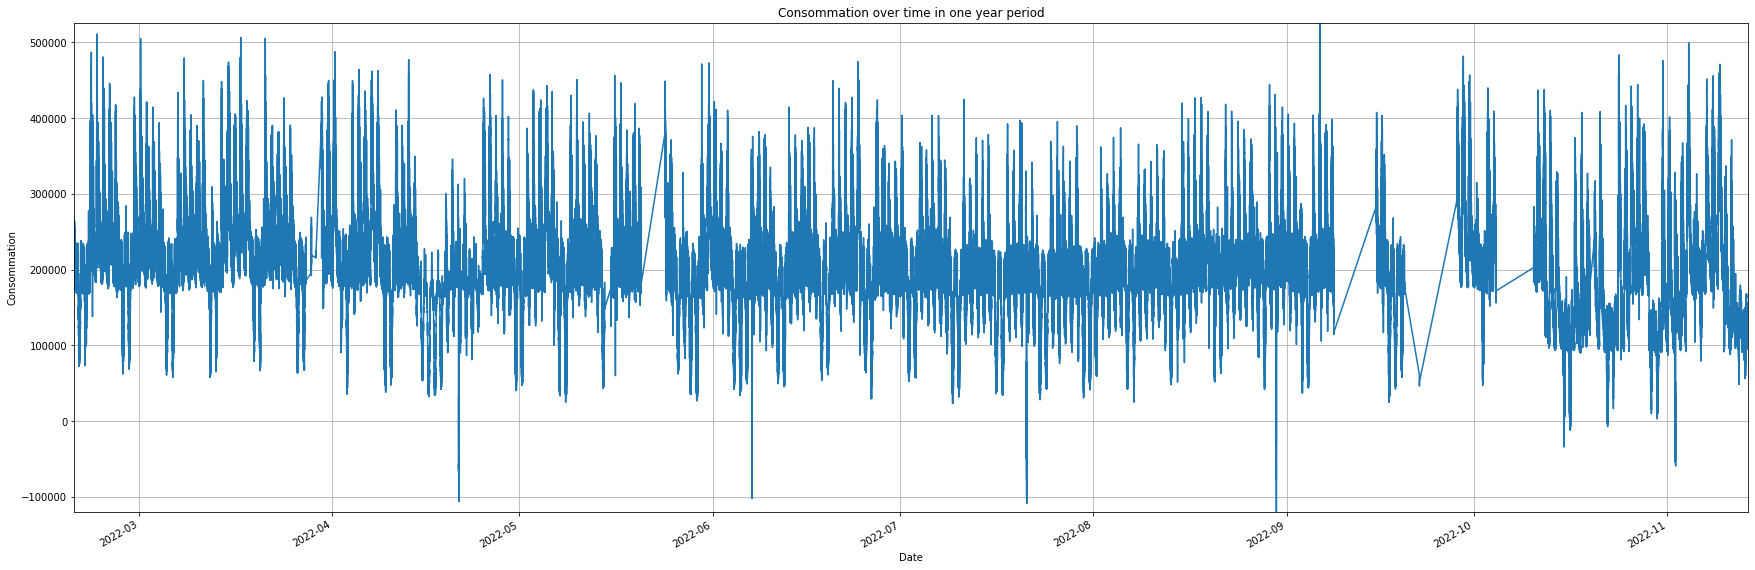

In [34]:
def plot_consommation_over_time_detailed_graph(): 
    fig, ax = plt.subplots(figsize=(30, 10))
    ax.plot(df['Date'], df['Value'])
    ax.set_title('Consommation over time in one year period')
    ax.set_xlabel('Date')
    ax.set_ylabel('Consommation')
    ax.set_xlim(df['Date'].min(), df['Date'].max())
    ax.set_ylim(df['Value'].min(), df['Value'].max())
    ax.grid(True)
    fig.autofmt_xdate()
    plt.show()

plot_consommation_over_time_detailed_graph()

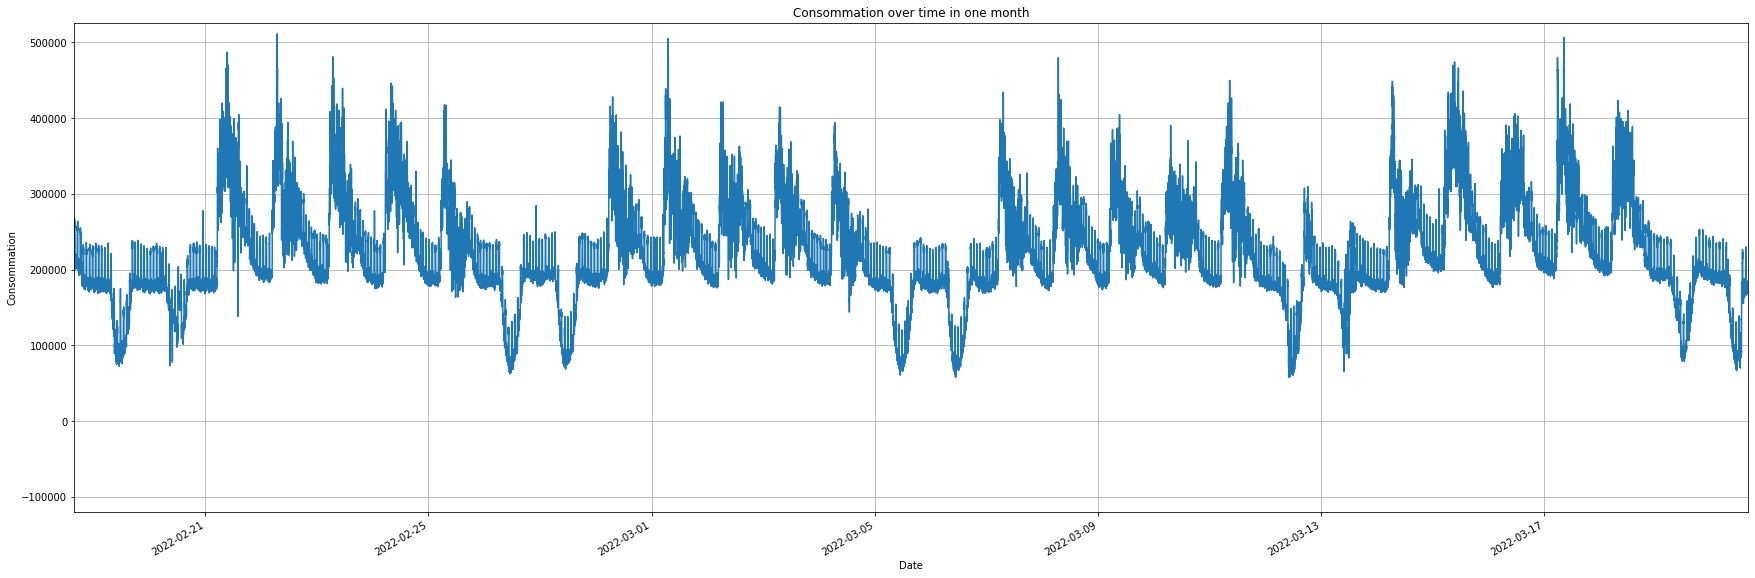

In [35]:
#function to plot the first 30 days 
def plot_consommation_over_time_zoomed_graph():
    fig, ax = plt.subplots(figsize=(30, 10))
    ax.plot(df['Date'], df['Value'])
    ax.set_title('Consommation over time in one month')
    ax.set_xlabel('Date')
    ax.set_ylabel('Consommation')
    ax.set_xlim(df['Date'].min(), df['Date'].min() + pd.Timedelta(days=30))
    ax.set_ylim(df['Value'].min(), df['Value'].max())
    ax.grid(True)
    fig.autofmt_xdate()
    plt.show()

plot_consommation_over_time_zoomed_graph()


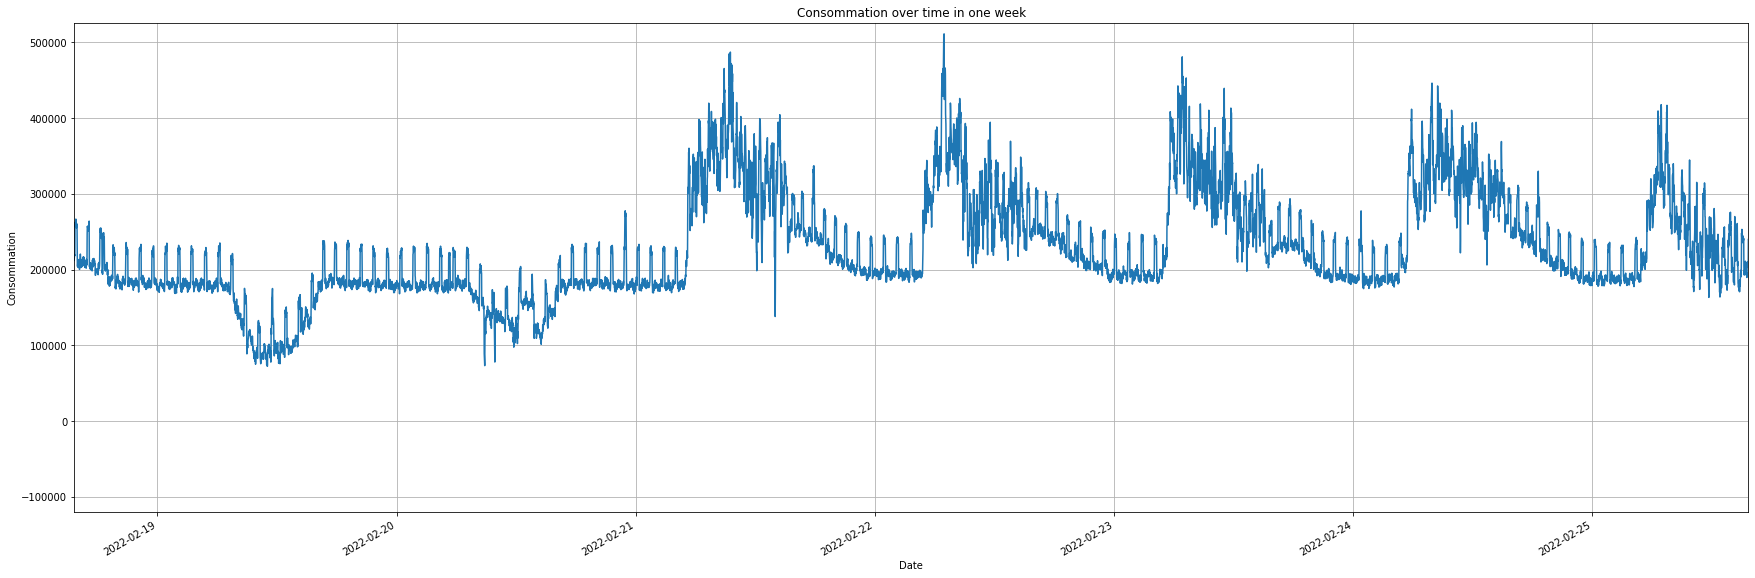

In [81]:
# function to plot the first week 
def plot_consommation_over_time_first_week():
    fig, ax = plt.subplots(figsize=(30, 10))
    ax.plot(df['Date'], df['Value'])
    ax.set_title('Consommation over time in one week')
    ax.set_xlabel('Date')
    ax.set_ylabel('Consommation')
    ax.set_xlim(df['Date'].min(), df['Date'].min() + pd.DateOffset(days=7))
    ax.set_ylim(df['Value'].min(), df['Value'].max())
    ax.grid(True)
    fig.autofmt_xdate()
    plt.show()

plot_consommation_over_time_first_week()

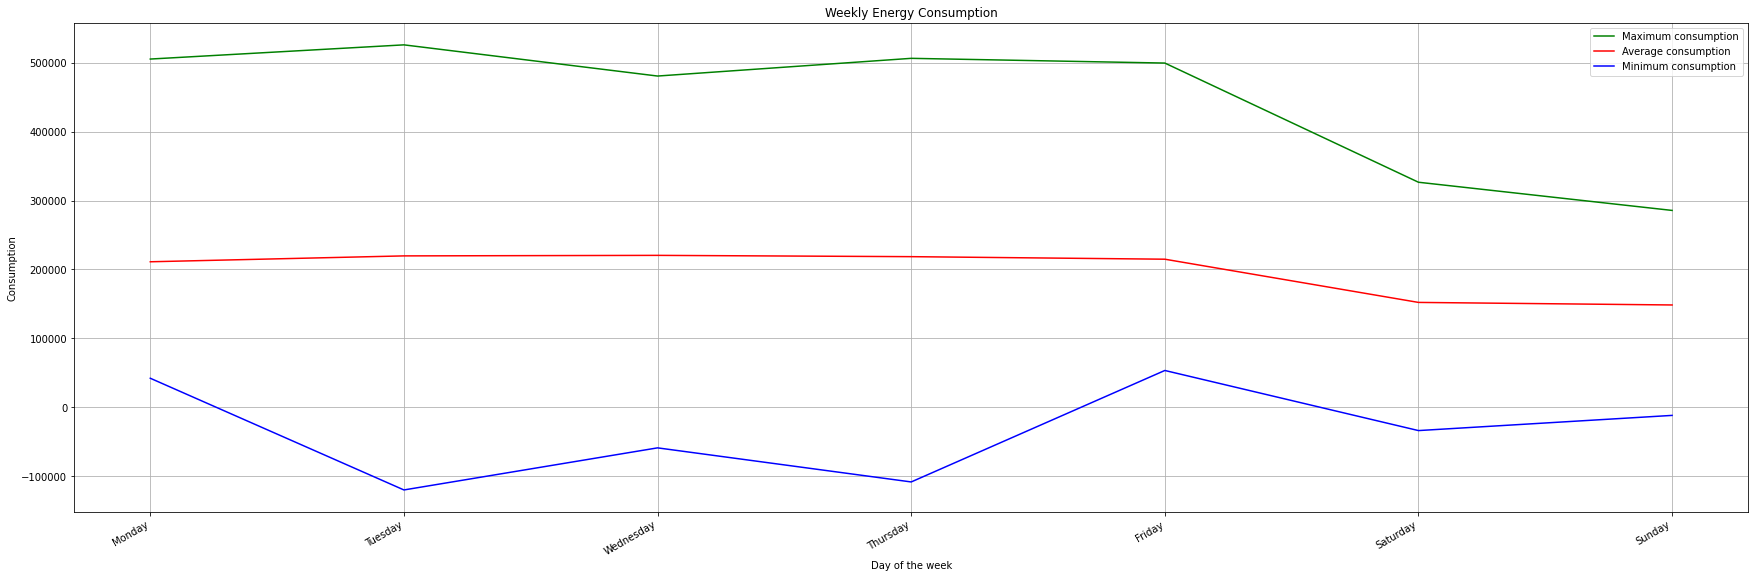

In [99]:
# function to plot the first week 
def plot_weekly_consumption():
    fig, ax = plt.subplots(figsize=(30, 10))
    ax.plot(df["Value"].groupby(df["Day_of_week"]).max().index, df["Value"].groupby(df["Day_of_week"]).max().values, color= "g", label= "Maximum consumption")
    ax.plot(df["Value"].groupby(df["Day_of_week"]).mean().index, df["Value"].groupby(df["Day_of_week"]).mean().values, color= "r", label= "Average consumption")
    ax.plot(df["Value"].groupby(df["Day_of_week"]).min().index, df["Value"].groupby(df["Day_of_week"]).min().values, color= "b", label= "Minimum consumption")
    ax.set_title('Weekly Energy Consumption')
    ax.set_xlabel('Day of the week')
    ax.set_ylabel('Consumption')
    ax.grid(True)
    ax.legend()
    fig.autofmt_xdate()
    plt.xticks([0, 1, 2, 3, 4, 5, 6], ["Monday", 'Tuesday', "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
    plt.show()

plot_weekly_consumption()

In [91]:
df["Value"].groupby(df["Day_of_week"]).mean().index

Int64Index([0, 1, 2, 3, 4, 5, 6], dtype='int64', name='Day_of_week')

## Weekend vs Weekdays

In [37]:
#add a column to datafame with 1 if it is a weekend day and 0 if it is a weekday
df['Weekend'] = df['Date'].dt.dayofweek.isin([5,6]).astype(int)
df.tail()

,Date,Value,Weekend,Winter,Working hour,Mean,Variance,Normalized,Year,Month,Day,Hour,Minute,Second
362000,2022-11-13 23:56:00,97817.538,1,1,0,197764.93159,4.322846e+09,-0.000023,2022,11,13,23,56,0
362001,2022-11-13 23:57:00,97344.145,1,1,0,197764.93159,4.322846e+09,-0.000023,2022,11,13,23,57,0
362002,2022-11-13 23:58:00,96617.403,1,1,0,197764.93159,4.322846e+09,-0.000023,2022,11,13,23,58,0
362003,2022-11-13 23:59:00,96638.174,1,1,0,197764.93159,4.322846e+09,-0.000023,2022,11,13,23,59,0
362004,2022-11-14 00:00:00,99724.063,0,1,0,197764.93159,4.322846e+09,-0.000023,2022,11,14,0,0,0


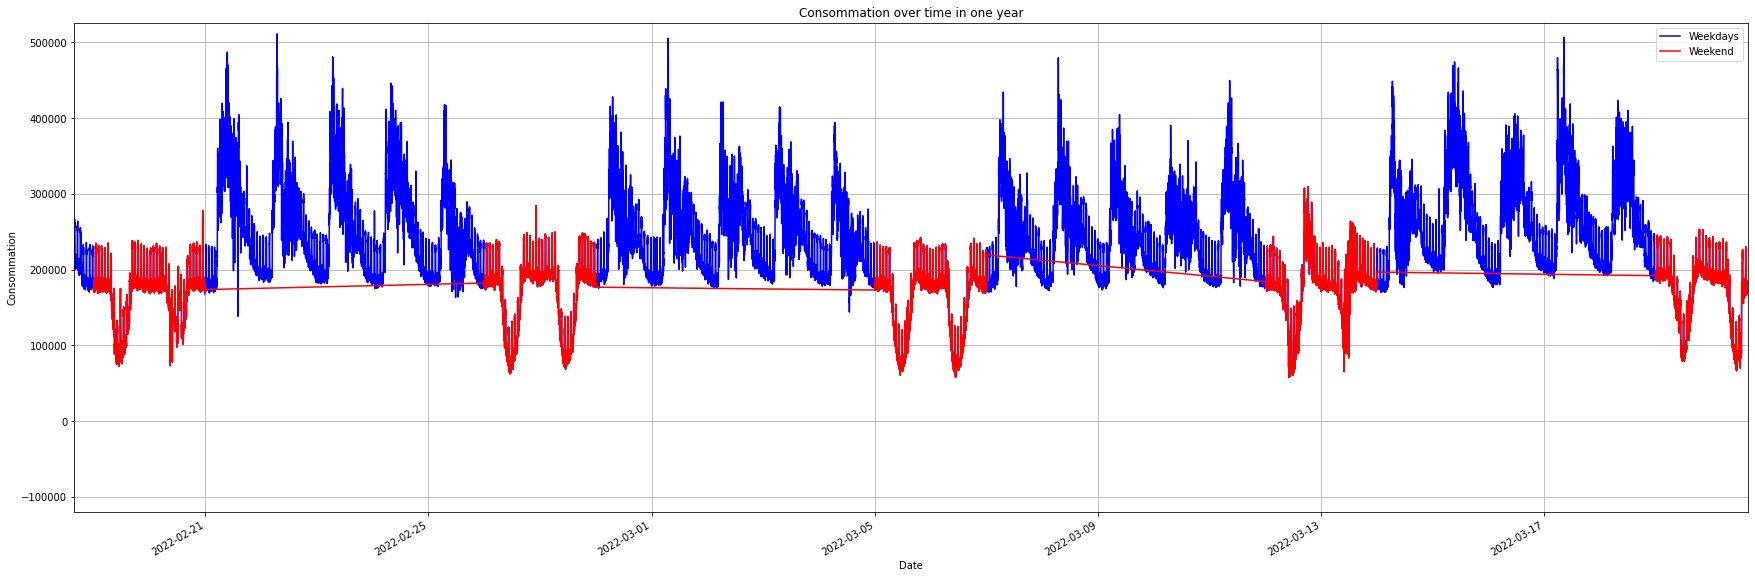

In [41]:
#function to plot the value with another color for the weekend days 
def plot_consommation_over_time_weekend():
    fig, ax = plt.subplots(figsize=(30, 10))
    ax.plot(df['Date'], df['Value'], color='blue', label= "Weekdays")
    ax.plot(df[df['Weekend'] == 1]['Date'], df[df['Weekend'] == 1]['Value'], color='red', label= "Weekend")
    ax.set_title('Consommation over time in one year')
    ax.set_xlabel('Date')
    ax.set_ylabel('Consommation')
    ax.set_xlim(df['Date'].min(), df['Date'].min() + pd.Timedelta(days=30))
    ax.set_ylim(df['Value'].min(), df['Value'].max())
    ax.grid(True)
    fig.autofmt_xdate()
    ax.legend()
    plt.show()
plot_consommation_over_time_weekend()

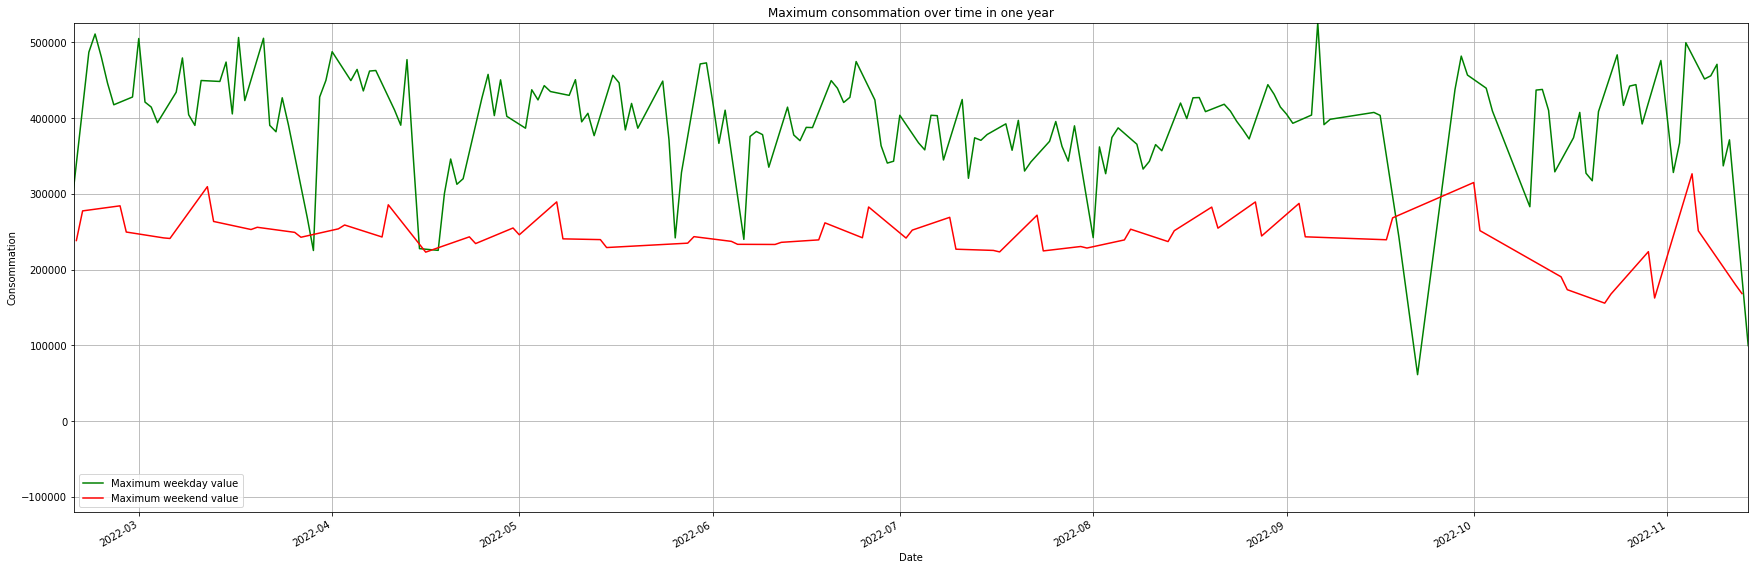

In [60]:
def plot_consommation_over_time_winter_peak():
    fig, ax = plt.subplots(figsize=(30, 10))
    #ax.plot(df['Date'], df['Value'], color='blue')
    #ax.plot(df[df['Winter'] == 1]['Date'], df[df['Winter'] == 1]['Value'], color='red')
    ax.plot(df[df['Weekend'] == 0].groupby(df['Date'].dt.date)['Value'].max(), color='green', label="Maximum weekday value")
    ax.plot(df[df['Weekend'] == 1].groupby(df['Date'].dt.date)['Value'].max(), color='red', label="Maximum weekend value")
    ax.set_title('Maximum consommation over time in one year')
    ax.set_xlabel('Date')
    ax.set_ylabel('Consommation')
    ax.set_xlim(df['Date'].min(), df['Date'].max())
    ax.set_ylim(df['Value'].min(), df['Value'].max())
    ax.grid(True)
    ax.legend()
    fig.autofmt_xdate()
    plt.show()

plot_consommation_over_time_winter_peak()

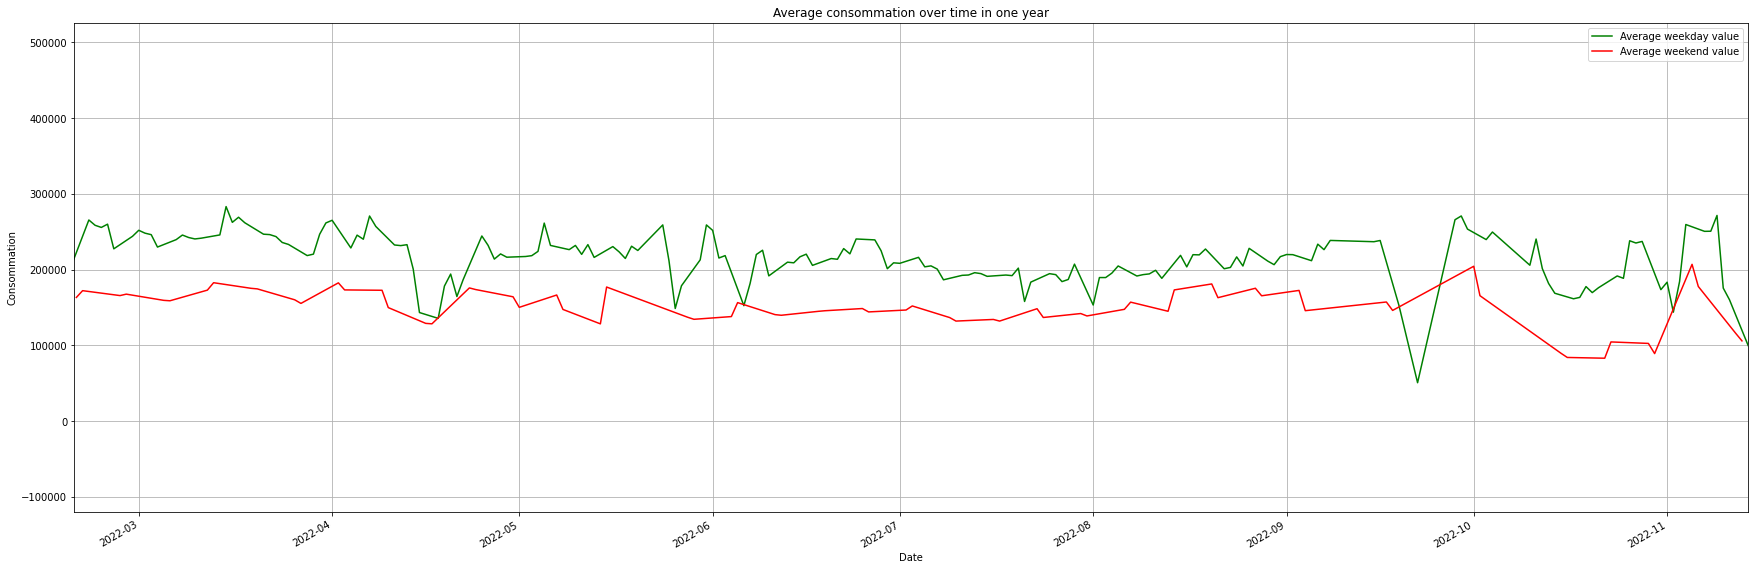

In [61]:
def plot_consommation_over_time_winter_peak():
    fig, ax = plt.subplots(figsize=(30, 10))
    #ax.plot(df['Date'], df['Value'], color='blue')
    #ax.plot(df[df['Winter'] == 1]['Date'], df[df['Winter'] == 1]['Value'], color='red')
    ax.plot(df[df['Weekend'] == 0].groupby(df['Date'].dt.date)['Value'].mean(), color='green', label="Average weekday value")
    ax.plot(df[df['Weekend'] == 1].groupby(df['Date'].dt.date)['Value'].mean(), color='red', label="Average weekend value")
    ax.set_title('Average consommation over time in one year')
    ax.set_xlabel('Date')
    ax.set_ylabel('Consommation')
    ax.set_xlim(df['Date'].min(), df['Date'].max())
    ax.set_ylim(df['Value'].min(), df['Value'].max())
    ax.grid(True)
    ax.legend()
    fig.autofmt_xdate()
    plt.show()

plot_consommation_over_time_winter_peak()

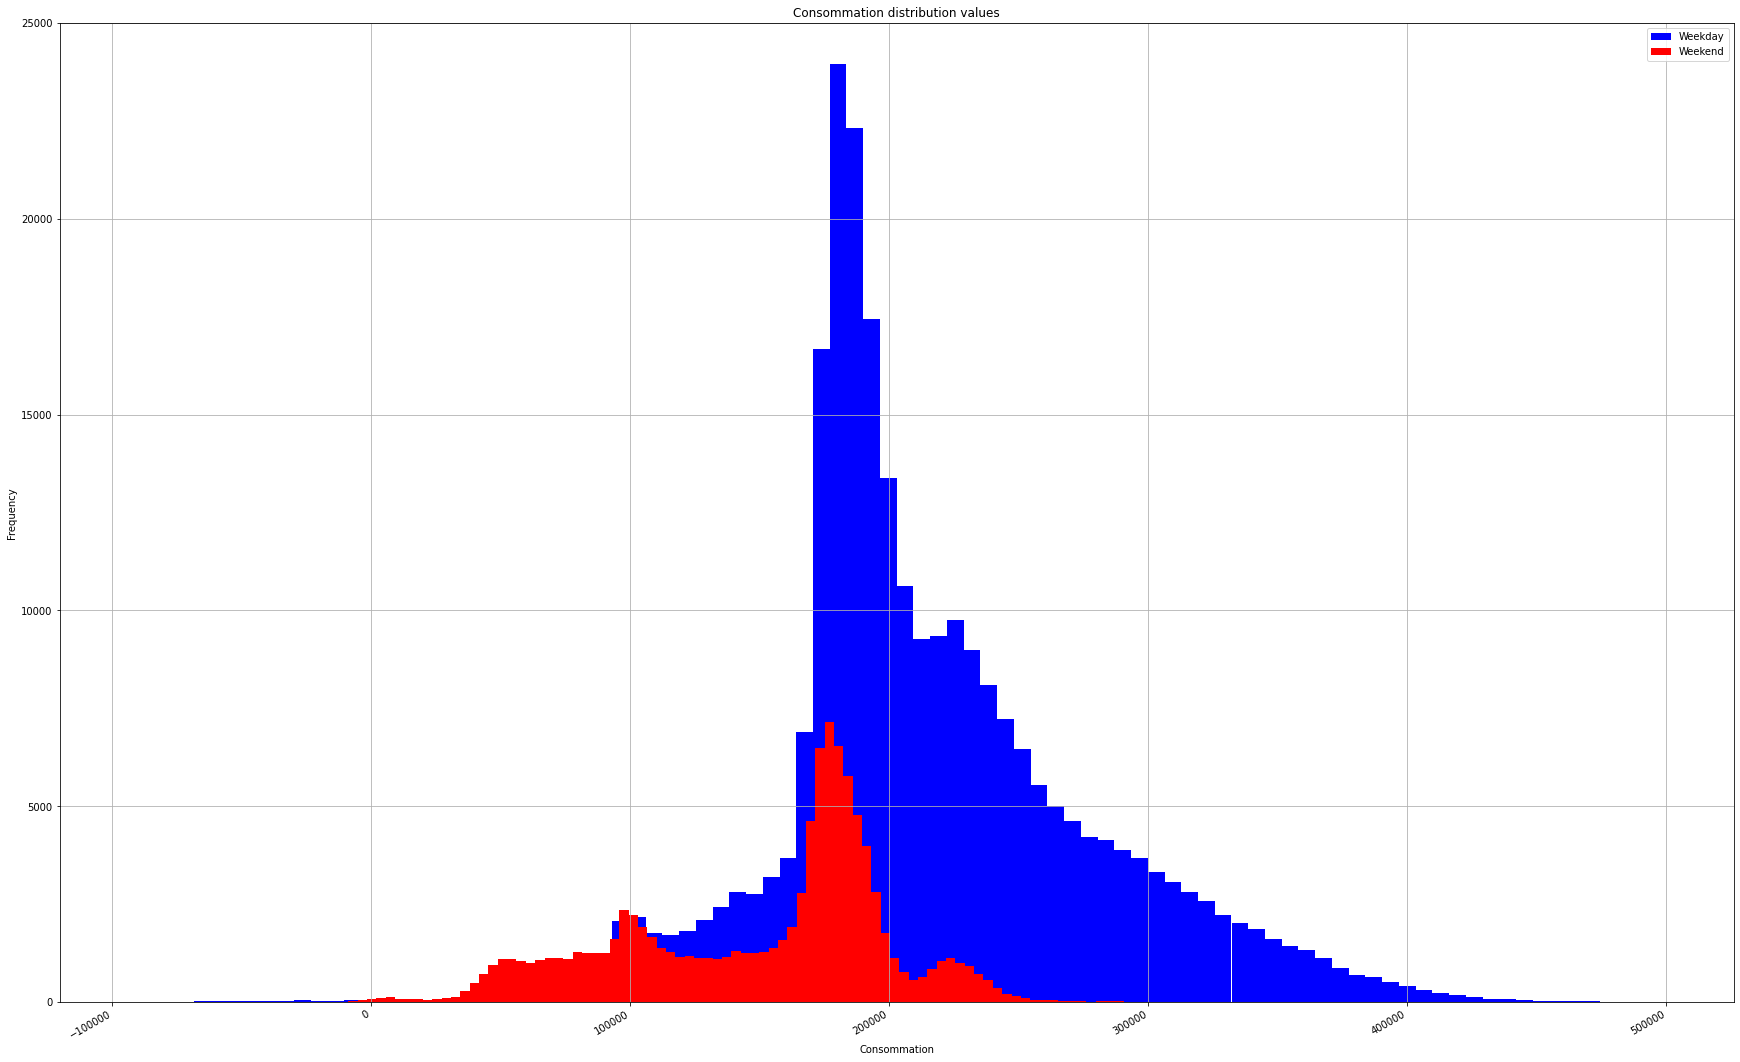

In [ ]:
def plot_consommation_over_time_weekend_distribution():
    fig, ax = plt.subplots(figsize=(30, 20))
    ax.hist(df[df['Weekend'] == 0]['Value'], bins=100, color='blue', label= "Weekday")
    ax.hist(df[df['Weekend'] == 1]['Value'], bins=100, color='red', label= "Weekend")
    ax.set_title('Consommation distribution values')
    ax.set_xlabel('Consommation')
    ax.set_ylabel('Frequency')
    ax.set_xlim(df['Value'].min(), df['Value'].max())
    ax.set_ylim(0, 25000)
    ax.grid(True)
    ax.legend()
    fig.autofmt_xdate()

    plt.show()

plot_consommation_over_time_weekend_distribution()

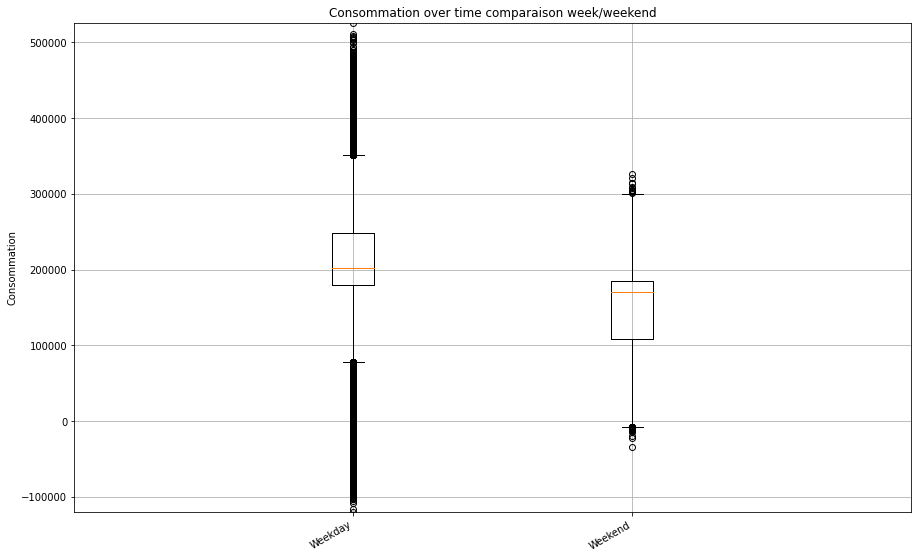

In [ ]:
def plot_consommation_over_time_weekend_boxplot():
    fig, ax = plt.subplots(figsize=(15, 10))
    ax.boxplot([df[df['Weekend'] == 0]['Value'], df[df['Weekend'] == 1]['Value']])
    ax.set_title('Consommation over time comparaison week/weekend')
    ax.set_ylabel('Consommation')
    ax.set_xlim(0, 3)
    ax.set_ylim(df['Value'].min(), df['Value'].max())
    ax.grid(True)
    plt.xticks([1, 2], ['Weekday', 'Weekend'])
    fig.autofmt_xdate()

    plt.show()

plot_consommation_over_time_weekend_boxplot()

## Winter vs Summer

In [18]:
# winter 1 and summer 0
df['Winter'] = df['Date'].dt.month.isin([11,12,1,2,3]).astype(int)
df.tail()

,Date,Value,Weekend,Winter
362000,2022-11-13 23:56:00,97817.538,1,1
362001,2022-11-13 23:57:00,97344.145,1,1
362002,2022-11-13 23:58:00,96617.403,1,1
362003,2022-11-13 23:59:00,96638.174,1,1
362004,2022-11-14 00:00:00,99724.063,0,1


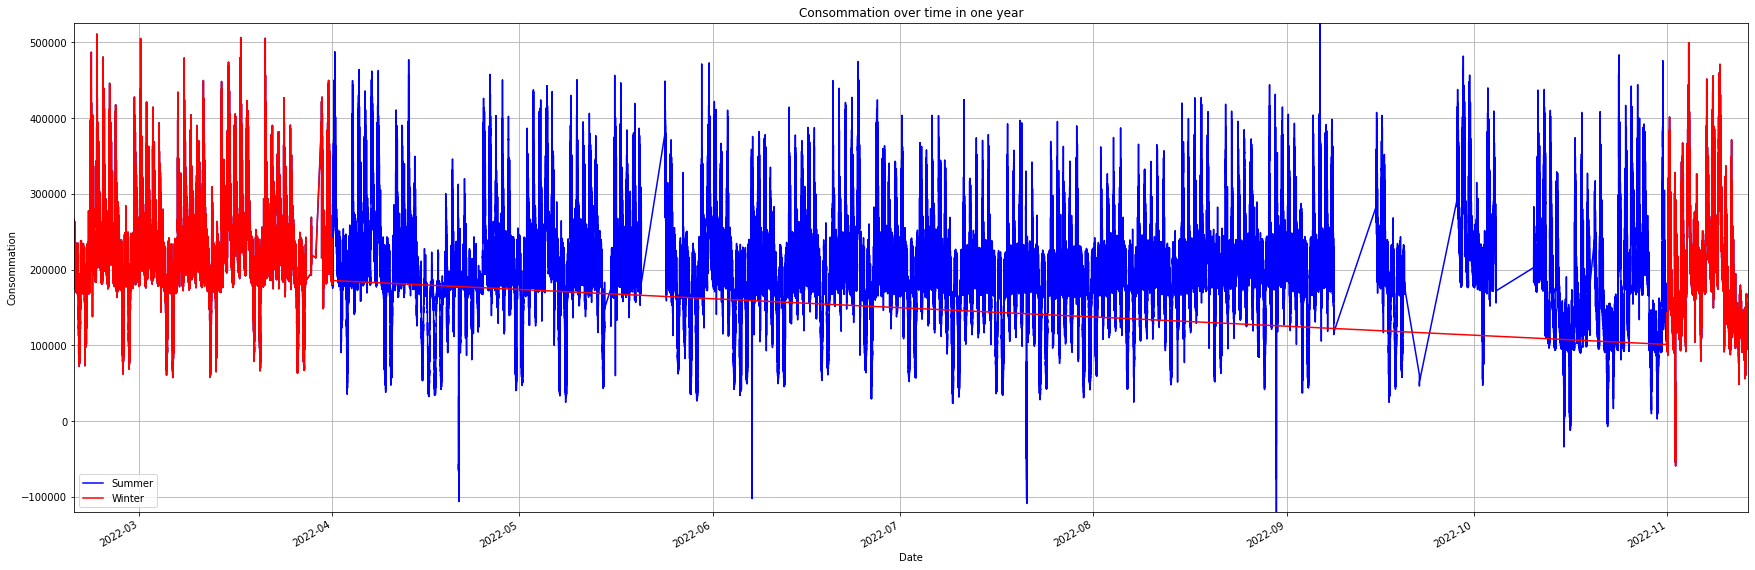

In [42]:
#plot the value with another color for the winter days
def plot_consommation_over_time_winter():
    fig, ax = plt.subplots(figsize=(30, 10))
    ax.plot(df['Date'], df['Value'], color='blue', label= "Summer")
    ax.plot(df[df['Winter'] == 1]['Date'], df[df['Winter'] == 1]['Value'], color='red', label= "Winter")
    ax.set_title('Consommation over time in one year')
    ax.set_xlabel('Date')
    ax.set_ylabel('Consommation')
    ax.set_xlim(df['Date'].min(), df['Date'].max())
    ax.set_ylim(df['Value'].min(), df['Value'].max())
    ax.grid(True)
    ax.legend()
    fig.autofmt_xdate()
    plt.show()

plot_consommation_over_time_winter()

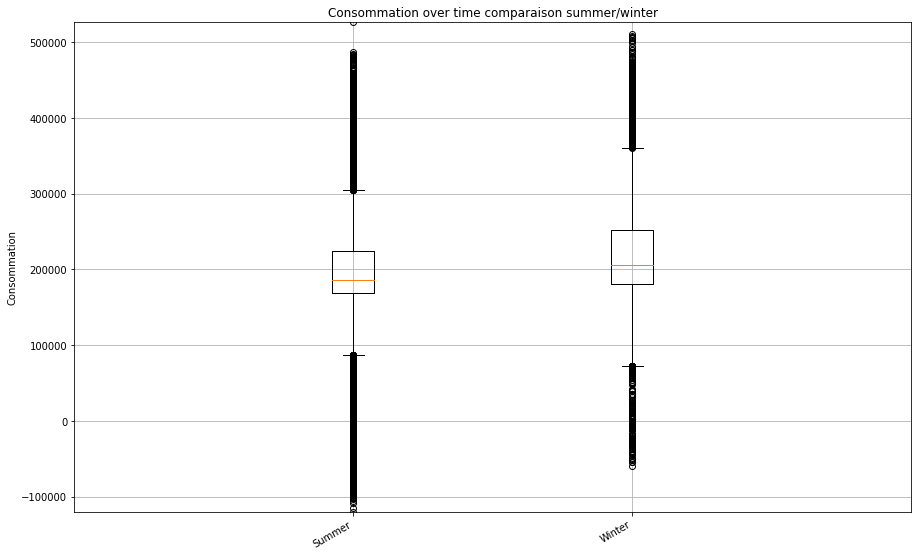

In [65]:
def plot_consommation_over_time_winter_boxplot():
    fig, ax = plt.subplots(figsize=(15, 10))
    ax.boxplot([df[df['Winter'] == 0]['Value'], df[df['Winter'] == 1]['Value']])
    ax.set_title('Consommation over time comparaison summer/winter')
    ax.set_ylabel('Consommation')
    ax.set_xlim(0, 3)
    ax.set_ylim(df['Value'].min(), df['Value'].max())
    ax.grid(True)
    plt.xticks([1, 2], ['Summer', 'Winter'])
    fig.autofmt_xdate()

    plt.show()

plot_consommation_over_time_winter_boxplot()

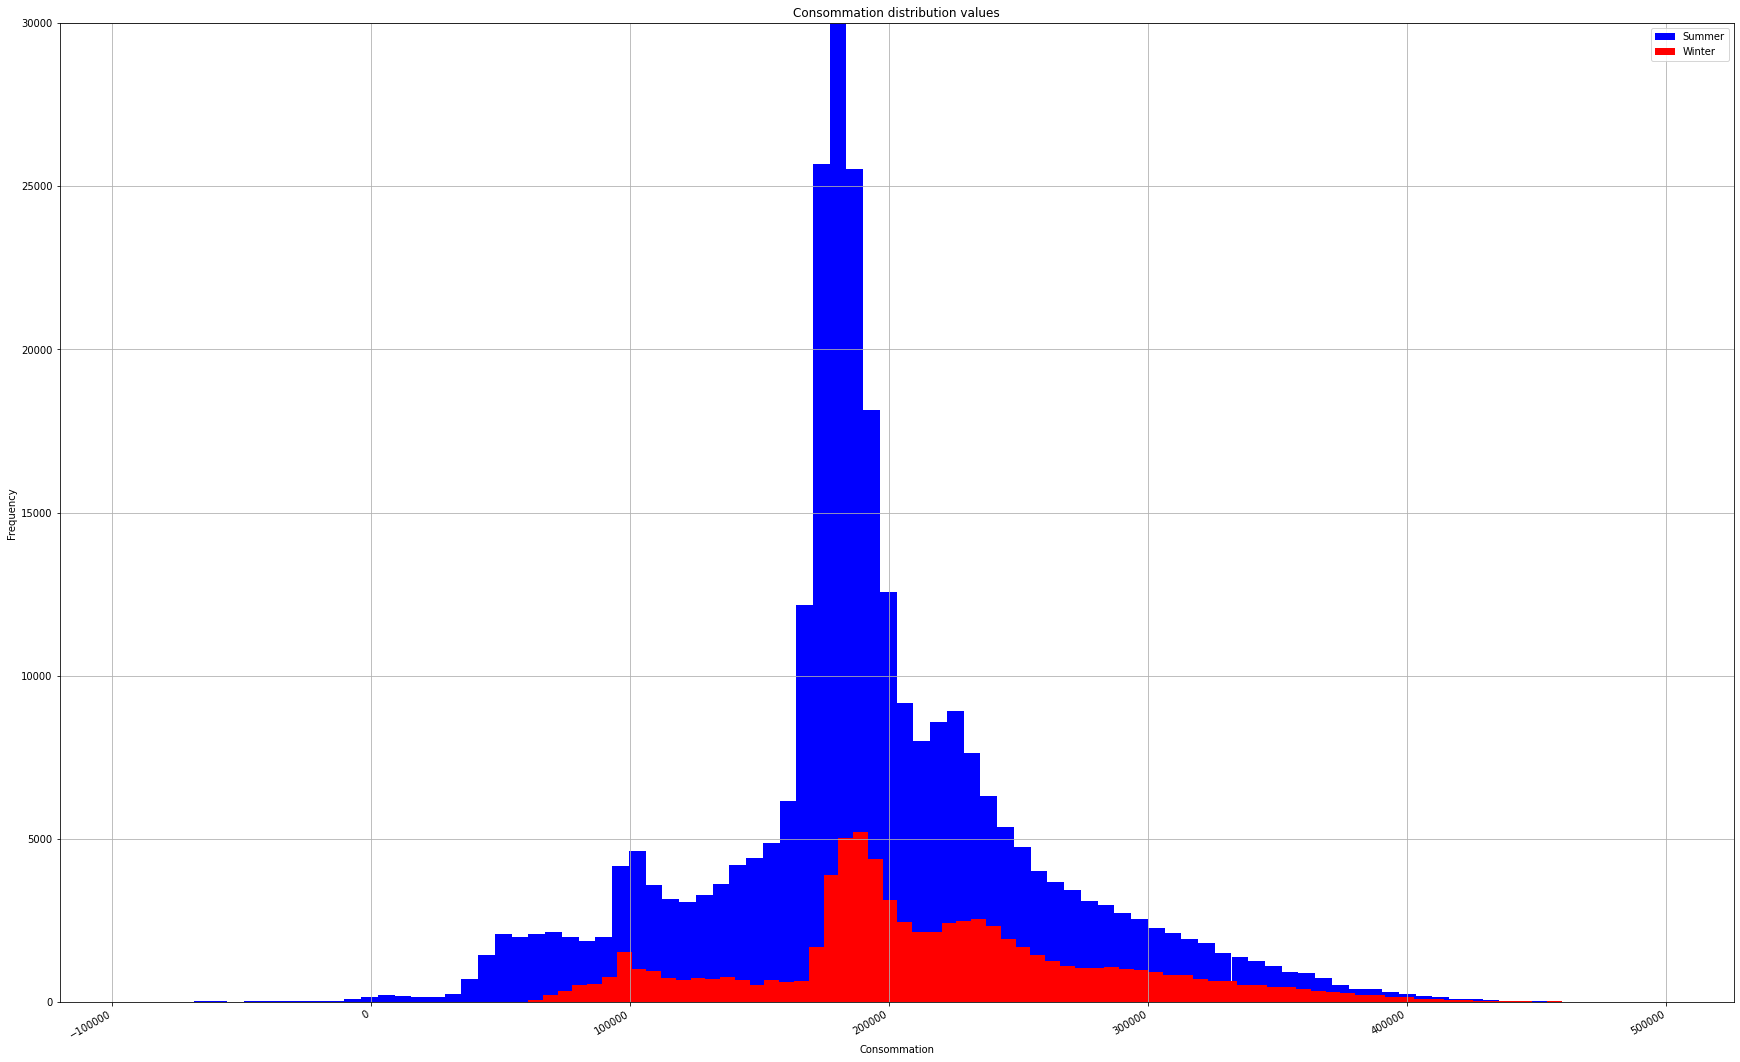

In [75]:
def plot_consommation_over_time_winter_distribution():
    fig, ax = plt.subplots(figsize=(30, 20))
    ax.hist(df[df['Winter'] == 0]['Value'], bins=100, color='blue', label= "Summer")
    ax.hist(df[df['Winter'] == 1]['Value'], bins=100, color='red', label= "Winter")
    ax.set_title('Consommation distribution values')
    ax.set_xlabel('Consommation')
    ax.set_ylabel('Frequency')
    ax.set_xlim(df['Value'].min(), df['Value'].max())
    ax.set_ylim(0, 30000)
    ax.grid(True)
    ax.legend()
    fig.autofmt_xdate()

    plt.show()

plot_consommation_over_time_winter_distribution()

## Working hours vs Free hours

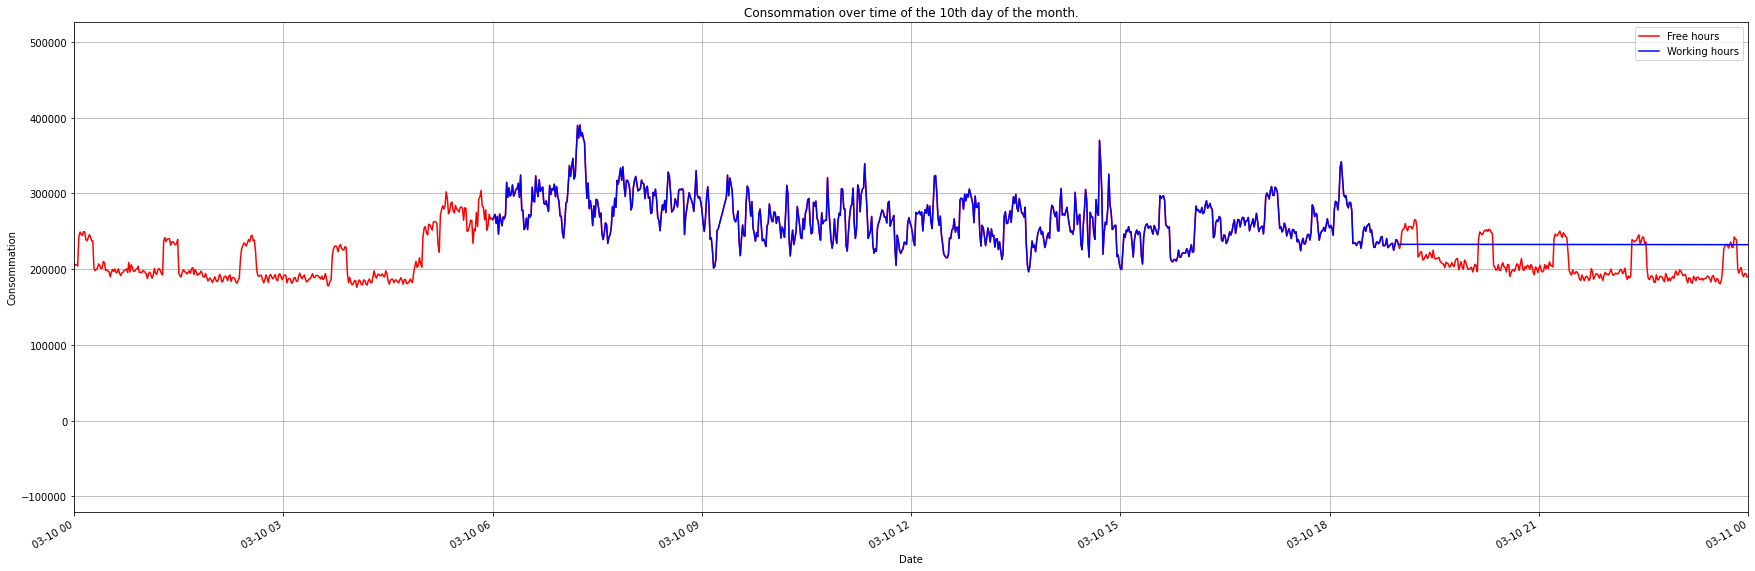

In [59]:
#function to plot the value for a chosen day that is a parameter

def plot_consommation_over_time_day(day):
    fig, ax = plt.subplots(figsize=(30, 10))
    ax.plot( df[df['Date'].dt.day == day]['Date'], df[df['Date'].dt.day == day]['Value'], color='red', label= "Free hours")
    ax.plot( df[(df['Date'].dt.day == day) & (df['Date'].dt.hour >= 6) & (df['Date'].dt.hour < 19)]['Date'], df[(df['Date'].dt.day == day) & (df['Date'].dt.hour >= 6) & (df['Date'].dt.hour < 19)]['Value'], color='blue', label= "Working hours")
    ax.set_title("Consommation over time of the 10th day of the month.")
    ax.set_xlabel('Date')
    ax.set_ylabel('Consommation')
    ax.set_xlim(df[df['Date'].dt.day == day]['Date'].min(), df[df['Date'].dt.day == day]['Date'].min() + pd.Timedelta(days=1))
    ax.set_ylim(df['Value'].min(), df['Value'].max())
    ax.grid(True)
    ax.legend()
    fig.autofmt_xdate()
    plt.show()

plot_consommation_over_time_day(10)

In [27]:
df['Working hour'] = ((df['Date'].dt.hour >= 6) & (df['Date'].dt.hour < 19)).astype(int)

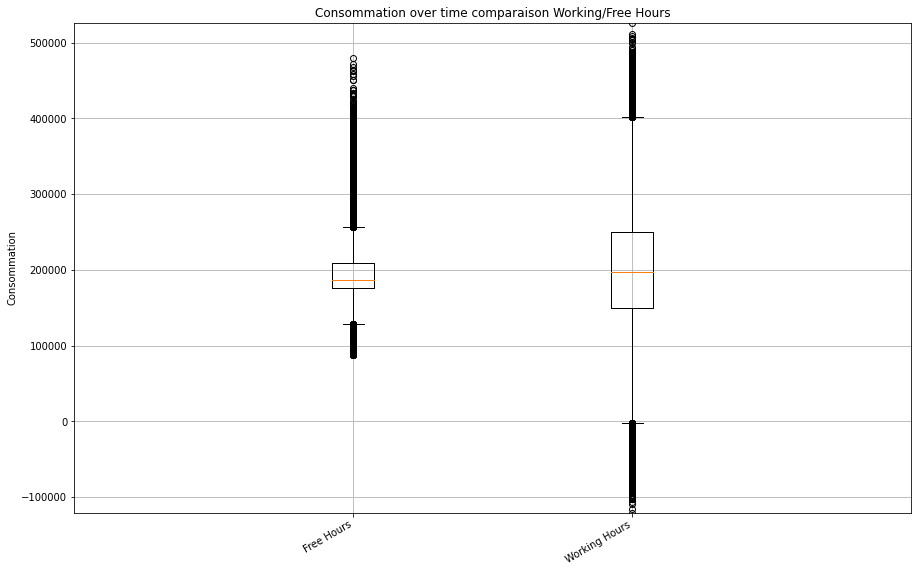

In [78]:
def plot_consommation_working_hours():
    fig, ax = plt.subplots(figsize=(15, 10))
    ax.boxplot([df[df['Working hour'] == 0]['Value'], df[df['Working hour'] == 1]['Value']])
    ax.set_title('Consommation over time comparaison Working/Free Hours')
    ax.set_ylabel('Consommation')
    ax.set_xlim(0, 3)
    ax.set_ylim(df['Value'].min(), df['Value'].max())
    ax.grid(True)
    plt.xticks([1, 2], ['Free Hours', 'Working Hours'])
    fig.autofmt_xdate()

    plt.show()

plot_consommation_working_hours()

# Data Normalization

In [28]:
df['Mean'] = df['Value'].mean()
df['Variance'] = df['Value'].var()
df['Normalized'] = (df['Value'] - df['Mean']) / df['Variance']

<AxesSubplot:>

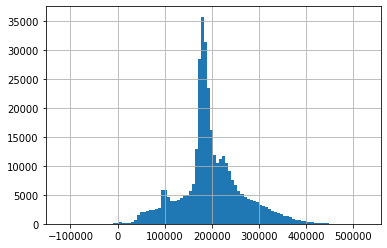

In [30]:
df.head()
#histograms pour voir si on garde la meme distribution en normalisant
df['Value'].hist(bins=100) 
df['Normalized'].hist(bins=100)

# Modeling

In [31]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor

# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

In [32]:
target_column = ['Value']
predictors = list(set(list(df.columns)) - set(target_column) - set(['Mean', 'Variance', 'Normalized', 'Date']))


X = df[predictors]
y = df[target_column]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [33]:
#Bon j'ai un peu copie ca d'un site mais il aime pas le datetime, a changer mais je pense c'est une bonne base
reg_all = MLPRegressor(hidden_layer_sizes=(100, 100, 100), activation='relu', solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
reg_all.fit(X_train, y_train)

y_pred = reg_all.predict(X_test)

rmse = sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(rmse)
print(r2)


C:\Users\Kelyan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1607: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Kelyan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:709: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


56098.24616338465
0.27102522635044146
